In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz


In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

# Taking top 10 most important features

In [3]:
X = pd.read_csv('../input/final_data.csv')
X = X[['EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3','AMT_ANNUITY','DAYS_BIRTH','prev_loans_CNT_INSTALMENT_FUTURE','prev_loans_SK_DPD_DEF','installment_AMT_PAYMENT','AMT_CREDIT','prev_appsCNT_PAYMENT']]
Y = pd.read_csv('../input/final_target.csv', header=None)
X.shape

(307511, 10)

In [4]:
Y = Y[1]

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=18)

# Training New Decision Tree

In [13]:
dtree = DecisionTreeClassifier(max_depth=6)
dtree.fit(X_train, y_train)
predictions = dtree.predict(X_test)
print(roc_auc_score(y_test, predictions))

0.5023103449546489


In [14]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
from collections import defaultdict

# Visualizing trained Decision Tree

In [15]:
export_graphviz(dtree,out_file="mytree.dot",class_names=['Repayed',"Default"],
    feature_names=X.columns,impurity=False,filled=True)

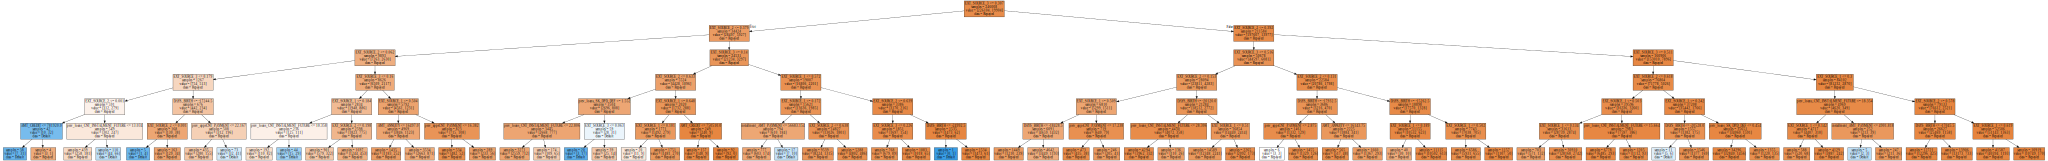

In [16]:
with open("mytree.dot") as f:
    dot_graph=f.read()
graphviz.Source(dot_graph)